In [158]:
from TM1py import TM1Service

In [160]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.1" 2019-04-16; Java(TM) SE Runtime Environment (build 12.0.1+12); Java HotSpot(TM) 64-Bit Server VM (build 12.0.1+12, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gk/lrw8xmys799c8qh7y17pvtmc0000gn/T/tmp3irmq5z2
  JVM stdout: /var/folders/gk/lrw8xmys799c8qh7y17pvtmc0000gn/T/tmp3irmq5z2/h2o_gusser_started_from_python.out
  JVM stderr: /var/folders/gk/lrw8xmys799c8qh7y17pvtmc0000gn/T/tmp3irmq5z2/h2o_gusser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_gusser_fiqjmj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [189]:
with TM1Service(address="xxx.xxx.xx.xxx", port=16333, user="admin", password="apple", ssl=True) as tm1:
    data = tm1.power_bi.execute_view(cube_name="Revenue", view_name="h2o_gross_revenue_prediction", private=False)

In [190]:
hf = h2o.H2OFrame(data)
hf = hf.asnumeric()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [191]:
hf.describe()

Rows:21618
Cols:8




,product,Channel,organization,Year,Month,Unit Price,Units Sold,Unit Cost
type,int,int,int,int,int,real,real,real
mins,21001.0,10.0,101.0,0.0,0.0,32.0,0.0,0.0
mean,32293.84096586182,19.991673605328767,251.75825700804867,1.000000000000001,5.499768711259115,567.9848700103119,30.308823230362552,308.2025583613646
maxs,42003.0,30.0,403.0,2.0,11.0,2400.0,934.0,1320.0
sigma,7321.243075324041,8.16684989821525,120.37959856978057,0.8161754639386198,3.4519715583304573,483.4181096541967,47.78731574322231,364.3857509634152
zeros,0,0,0,7200,1802,0,90,6480
missing,0,0,0,0,0,18,0,0
0,21002.0,10.0,101.0,0.0,4.0,70.0,271.94,47.043099999999995
1,21002.0,10.0,101.0,0.0,3.0,70.0,271.94,47.043099999999995
2,21002.0,10.0,101.0,0.0,7.0,70.0,271.94,47.043099999999995


In [192]:
y = "Units Sold"

In [193]:
splits = hf.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [194]:
aml = H2OAutoML(max_runtime_secs = 120, seed = 1, project_name = "revenue_v2_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [195]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200820_143440,199.729,14.1326,199.729,5.99129,nan
XGBoost_grid__1_AutoML_20200820_143440_model_3,207.359,14.4,207.359,5.98275,nan
StackedEnsemble_BestOfFamily_AutoML_20200820_143440,212.509,14.5777,212.509,6.15315,nan
XGBoost_2_AutoML_20200820_143440,237.973,15.4264,237.973,6.40993,nan
XGBoost_1_AutoML_20200820_143440,282.507,16.808,282.507,7.48051,nan
GBM_4_AutoML_20200820_143440,320.5,17.9025,320.5,7.07437,nan
GBM_grid__1_AutoML_20200820_143440_model_2,329.728,18.1584,329.728,8.61257,nan
GBM_3_AutoML_20200820_143440,335.325,18.3119,335.325,7.50595,nan
GBM_2_AutoML_20200820_143440,353.655,18.8057,353.655,8.3723,nan
XGBoost_grid__1_AutoML_20200820_143440_model_1,519.915,22.8017,519.915,10.6555,nan


In [196]:
pred = aml.predict(test)
pred

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
286.312
161.106
104.766
225.349
186.133
177.35
98.318
136.364
161.19
150.648


In [197]:
with TM1Service(address="10.25.0.218", port=16333, user="admin", password="apple", ssl=True) as tm1:
    toPredict = tm1.power_bi.execute_view(cube_name="Revenue", view_name="h2o_gross_revenue_predictionv2", private=False)

In [198]:
pf = h2o.H2OFrame(toPredict)
pf = pf.asnumeric()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [199]:
pred = aml.predict(pf)
pred

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
303.268
279.769
286.312
233.238
283.107
274.415
230.306
179.781
160.722
161.106


In [200]:
data_as_df = pf.as_data_frame()
pred_as_df = pred.as_data_frame()

In [75]:
import matplotlib.pyplot as plt

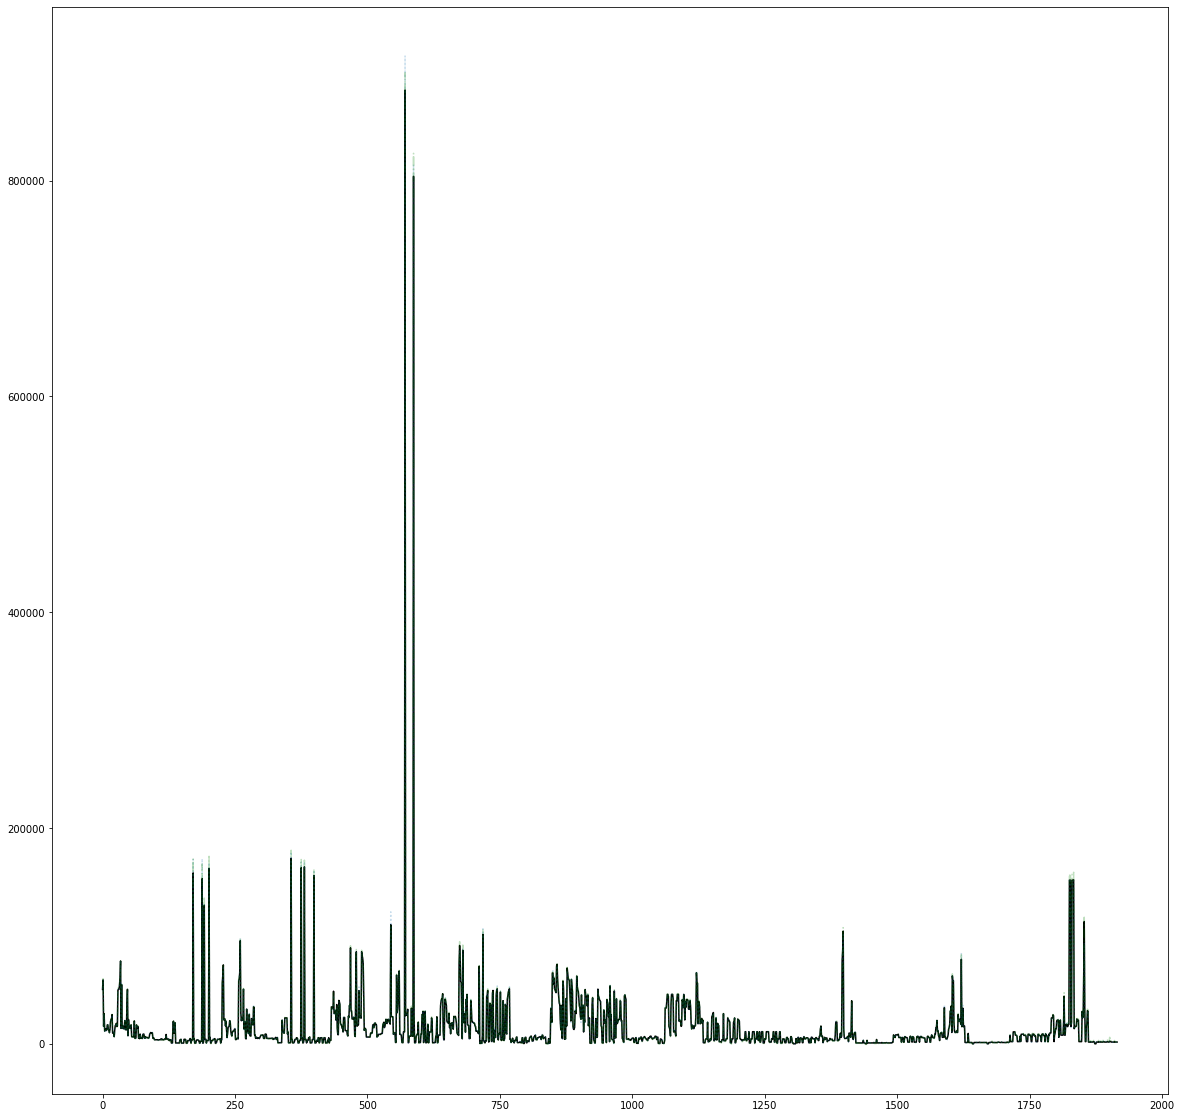

In [135]:
fig = plt.figure(figsize=(20, 20))
plt.plot(data_as_df["Gross Revenue"], 'k')
plt.plot(pred_as_df["predict"], ':', alpha=.25)
plt.plot(pred2_as_df["predict"], 'g-.', alpha=.25)

plt.show()

In [203]:
data_as_df

,product,Channel,organization,Year,Month,Unit Price,Units Sold,Unit Cost
0,21002,10,101,0,4,70.0,0,47
1,21002,10,101,0,3,70.0,0,47
2,21002,10,101,0,7,70.0,0,47
3,21002,10,101,0,0,70.0,0,47
4,21002,10,101,0,8,70.0,0,47
...,...,...,...,...,...,...,...,...
20407,42003,30,403,2,1,320.0,0,0
20408,42003,30,403,2,11,320.0,0,0
20409,42003,30,403,2,10,320.0,0,0
20410,42003,30,403,2,9,320.0,0,0


In [209]:
def map_year(year):
    switcher = {
        0: "Y1",
        1: "Y2",
        2: "Y3",
    }
    return switcher.get(year,"Y0")

In [212]:
def map_month(month):
    switcher = {
        0: "Jan",
        1: "Feb",
        2: "Mar",
        3: "Apr",
        4: "May",
        5: "Jun",
        6: "Jul",
        7: "Aug",
        8: "Sep",
        9: "Oct",
        10: "Nov",
        11: "Dec",
    }
    return switcher.get(month,"Y0")

In [213]:
map_month(0)

'Jan'

In [234]:
data_as_df

,product,Channel,organization,Year,Month,Unit Price,Units Sold,Unit Cost
0,21002,10,101,0,4,70.0,0,47
1,21002,10,101,0,3,70.0,0,47
2,21002,10,101,0,7,70.0,0,47
3,21002,10,101,0,0,70.0,0,47
4,21002,10,101,0,8,70.0,0,47
...,...,...,...,...,...,...,...,...
20407,42003,30,403,2,1,320.0,0,0
20408,42003,30,403,2,11,320.0,0,0
20409,42003,30,403,2,10,320.0,0,0
20410,42003,30,403,2,9,320.0,0,0


In [247]:
pred_as_df

,predict
0,303.267642
1,279.769378
2,286.311994
3,233.238466
4,283.107238
...,...
20407,11.062539
20408,10.311907
20409,11.186735
20410,11.041899


In [244]:
# Declare the cellset
cellset = {}
# Prepare the cellset
for row in data_as_df.index:
    #cellset[(str(row.year), str(row.month).zfill(2), 'PREDICTION1', 'CUSTOMERS','COSTS')] = pred_uc.predicted_mean[row]
    cellset[(
        data_as_df.loc[row,'organization'],
        data_as_df.loc[row,'Channel'],
        data_as_df.loc[row,'product'],
        map_month(data_as_df.loc[row,'Month']),
        map_year(data_as_df.loc[row,'Year']),
        'Predictivev2','Units Sold')] = int(pred_as_df.loc[row,'predict'])

In [246]:
with TM1Service(address="10.25.0.218", port=16333, user="admin", password="apple", ssl=True) as tm1:
    tm1.cubes.cells.write_values('Revenue', cellset)

In [248]:
h2o.shutdown()

H2O session _sid_9659 closed.
